In [141]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [143]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


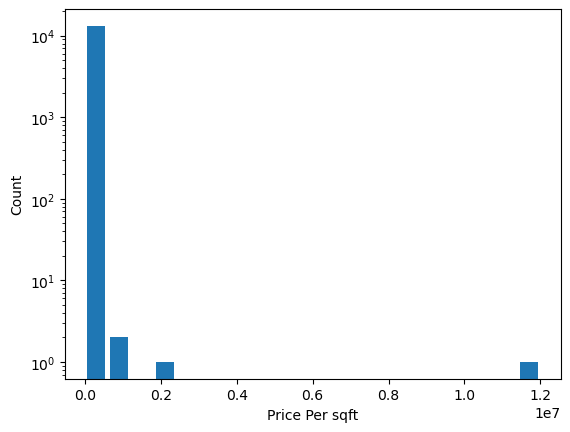

In [144]:
plt.hist(df.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("Price Per sqft")
plt.ylabel("Count")
plt.yscale('log')
plt.show()

# Outliers Removing

Outlier Method 1

In [145]:
min_bound,max_bound = df.price_per_sqft.quantile([0.001,0.999])
min_bound,max_bound

(1366.184, 50959.36200000098)

In [146]:
df1 = df[(df.price_per_sqft>min_bound)&(df.price_per_sqft<max_bound)]

In [147]:
df1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000
mean,1537.861049,2.690100,111.591865,2.799651,6663.653735
std,967.123711,1.337026,145.372047,1.291130,4141.020700
min,250.000000,1.000000,8.000000,1.000000,1379.000000
25%,1100.000000,2.000000,50.000000,2.000000,4271.000000
50%,1274.500000,2.000000,71.550000,3.000000,5438.000000
75%,1670.000000,3.000000,120.000000,3.000000,7311.000000
max,30400.000000,40.000000,3600.000000,43.000000,50349.000000


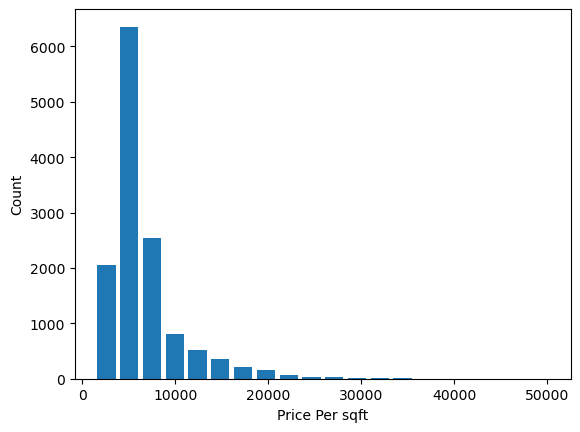

In [148]:
plt.hist(df1.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("Price Per sqft")
plt.ylabel("Count")
plt.show()

In [149]:
# OUTLIERS REMOVED:
df.shape[0]-df1.shape[0]

28

Outlier Method 2

In [150]:
mean = df1.price_per_sqft.mean()
standard_dev = df1.price_per_sqft.std()
dev_count = 4

In [151]:
Left_IQR = mean - dev_count*standard_dev
Right_IQR = mean + dev_count*standard_dev

In [152]:
df2 = df1[(df1.price_per_sqft>Left_IQR)&(df1.price_per_sqft<Right_IQR)]

In [153]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13047.000000,13047.00000,13047.000000,13047.000000,13047.000000
mean,1529.296249,2.66613,105.850314,2.776270,6449.328045
std,948.777194,1.26673,118.818313,1.211623,3487.670005
min,250.000000,1.00000,8.000000,1.000000,1379.000000
25%,1100.000000,2.00000,50.000000,2.000000,4259.000000
50%,1270.000000,2.00000,70.000000,3.000000,5415.000000
75%,1660.000000,3.00000,117.500000,3.000000,7222.000000
max,30400.000000,27.00000,2340.000000,27.000000,23214.000000


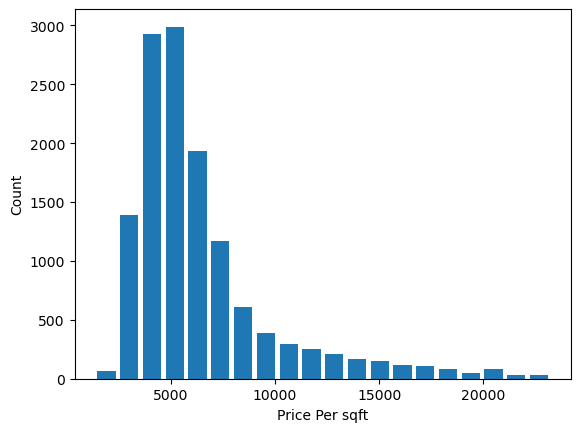

In [154]:
plt.hist(df2.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("Price Per sqft")
plt.ylabel("Count")
# plt.yscale("log")
plt.show()

In [155]:
# OUTLIERS REMOVED:
df1.shape[0]-df2.shape[0]

125

Outlier Method 3

In [156]:
mean = df2.price_per_sqft.mean()
num_deviation = 4
deviation = df2.price_per_sqft.std()

In [157]:
df2["zscore"] = (df2.price_per_sqft - mean)/deviation

/var/folders/nk/r48g86bn2l1dvvj5_b52rbrh0000gn/T/ipykernel_2153/2196384446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["zscore"] = (df2.price_per_sqft - mean)/deviation


In [158]:
df3 = df2[(df2.zscore>-4)&(df2.zscore<4)]

In [159]:
outliers = df2[(df2.zscore<-4)|(df2.zscore>4)]
outliers.shape

(86, 8)

In [160]:
df3.describe()

,total_sqft,bath,price,bhk,price_per_sqft,zscore
count,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000
mean,1524.965601,2.653653,103.394417,2.764601,6348.153383,-0.029009
std,937.363873,1.252351,109.963795,1.198855,3269.007986,0.937304
min,250.000000,1.000000,8.000000,1.000000,1379.000000,-1.453787
25%,1100.000000,2.000000,49.970000,2.000000,4251.000000,-0.630314
50%,1272.000000,2.000000,70.000000,3.000000,5394.000000,-0.302588
75%,1660.000000,3.000000,115.000000,3.000000,7153.000000,0.201760
max,30400.000000,27.000000,2200.000000,27.000000,20357.000000,3.987669


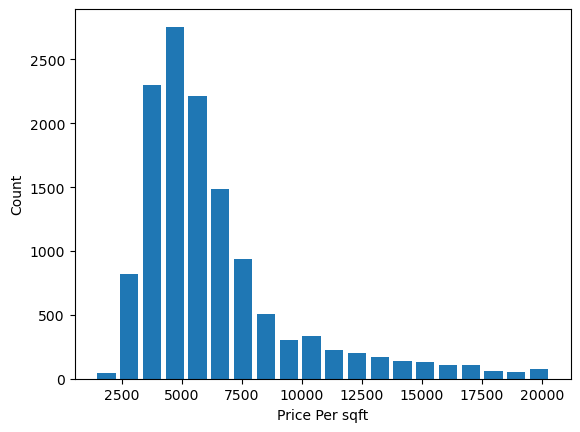

In [161]:
plt.hist(df3.price_per_sqft,bins=20,rwidth=0.8)
plt.xlabel("Price Per sqft")
plt.ylabel("Count")
plt.show()

In [162]:
# OUTLIERS REMOVED:
df2.shape[0]-df3.shape[0]

86